In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Gerekli kütüphaneler import edildi.

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/smoking_health_data_final.csv')

Verisetimiz df adlı değişkene atandı.

In [51]:
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [52]:
df.isna().sum()

,0
age,0
sex,0
current_smoker,0
heart_rate,0
blood_pressure,0
cigs_per_day,14
chol,7


[*cigs_per_day*] ve [*chol*] sütununda 3900'ar değerden sadece **14** ve **7** adet boş değerimiz var.

In [53]:
df = df.dropna()

In [54]:
df.count()

,0
age,3879
sex,3879
current_smoker,3879
heart_rate,3879
blood_pressure,3879
cigs_per_day,3879
chol,3879


Boş değerler verisetinden temizlendi (Toplam **21** değer)

In [55]:
df.describe()

,age,heart_rate,cigs_per_day,chol
count,3879.000000,3879.000000,3879.000000,3879.000000
mean,49.543181,75.699149,9.163702,236.629286
std,8.565955,12.023013,12.035201,44.413846
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


Veri Setinin yaş ortalaması **50**. En az **32** yaşın ve en fazla **70** yaşında kişi var. <br>


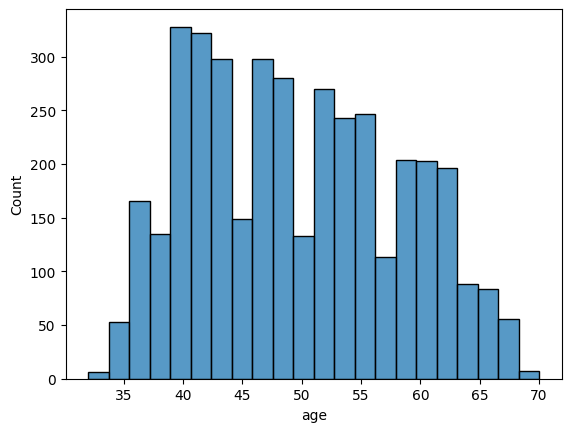

In [ ]:
sns.histplot(data=df, x="age")
plt.show()

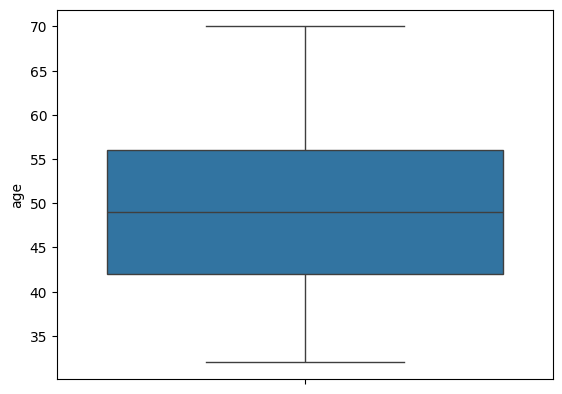

In [140]:
sns.boxplot(y=df["age"])
plt.show()

Veri setimizin yaş kolonunda herhangi bir outlier değer görünmemekte. Yaş verileri **normal dağılmış** gibi gözüküyor.

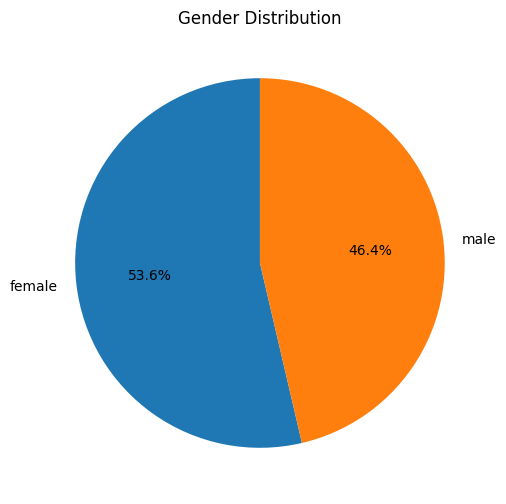

In [56]:
size = df['sex'].value_counts()
labels = size.index

plt.figure(figsize=(6,6))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

Veri setimizin **%53.6**'sının kadın, **%46.4**'ünün erkek olduğunu görüyoruz.

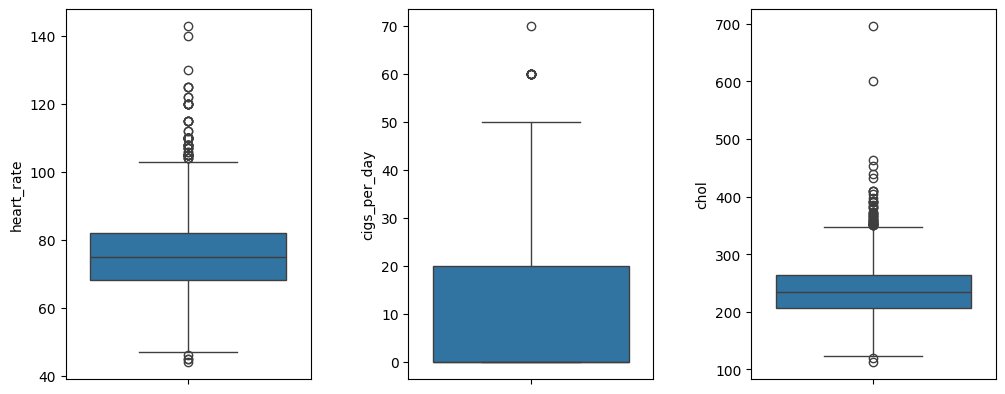

In [144]:
fig = plt.figure(figsize=(12,12))
plt.subplot(2,3,1)
sns.boxplot(y=df["heart_rate"])
plt.subplot(2,3,2)
sns.boxplot(y=df["cigs_per_day"])
plt.subplot(2,3,3)
sns.boxplot(y=df["chol"])

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

**heart_rate (kalp atış hızı)**

*   Ortalaması (median çizgisi) yaklaşık 75 civarı.
*   Çoğu değer 70–85 aralığında toplanmış.
*   Bazı düşük outlier’lar (40–50 bpm civarı) ve oldukça yüksek outlier’lar (120–140 bpm) var.
*   Büyük çoğunluğu normal sınırlar içinde.

**cigs_per_day (günde içilen sigara miktarı)**

*   Median 0’a yakın (kutunun ortasında çok düşük).
*   Verilerin büyük çoğunluğu 0–20 sigara/gün aralığında.
*   Çok az sayıda uç değer (outlier) var → mesela 50, 60, hatta 70 sigara içen kişiler.
*   Birkaç kişi aşırı içici.

**chol (kolesterol)**

*   Median 240 civarında.
*   Çoğu değer 200–270 mg/dL aralığında.
*   Çok düşük outlier’lar (100 civarı) ve çok yüksek outlier’lar (600–700 mg/dL) var.
*    Normal sınırlar (genelde <200 mg/dL kabul edilir) aşılmış; birçok kişi yüksek kolesterole sahip.

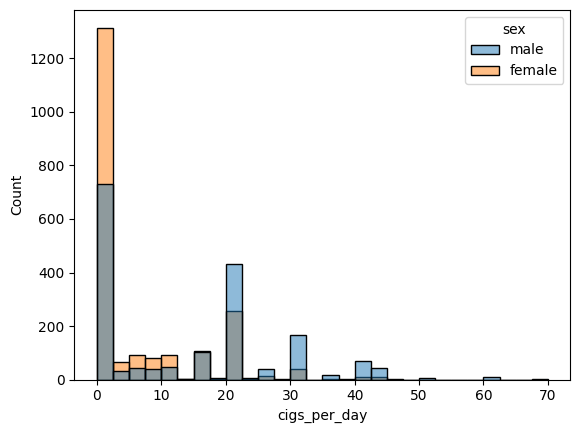

In [57]:
sns.histplot(data=df, x="cigs_per_day", hue="sex")
plt.show()

Bir günde 20'den fazla sigara içenlerin çoğunluğunun **erkek** olduğunu görmekteyiz.

In [109]:
uses_cigaratte = df[df["cigs_per_day"] > 20]
zero_cigaratte = df[df["cigs_per_day"] == 0]

Burada günde 20'den fazla sigara kullanan ve hiç kullanmayan olarak ayırıyoruz.

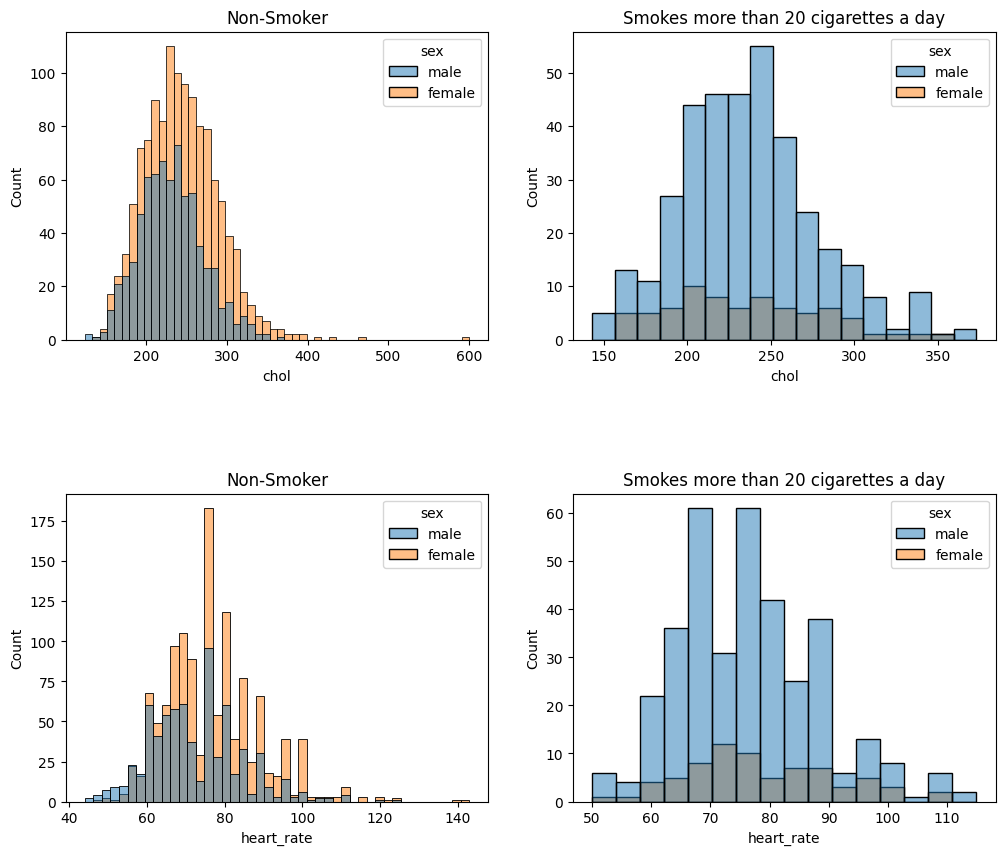

In [146]:
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(data=zero_cigaratte, x="chol", hue="sex")
plt.title("Non-Smoker")
plt.subplot(2,2,2)
sns.histplot(data=uses_cigaratte, x="chol", hue="sex")
plt.title("Smokes more than 20 cigarettes a day")
plt.subplot(2,2,3)
sns.histplot(data=zero_cigaratte, x="heart_rate", hue="sex")
plt.title("Non-Smoker")
plt.subplot(2,2,4)
sns.histplot(data=uses_cigaratte, x="heart_rate", hue="sex")
plt.title("Smokes more than 20 cigarettes a day")
plt.subplots_adjust(hspace=0.5)
plt.show()